In [1]:
import random
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from scipy.stats import norm
import requests
import json

from datetime import datetime
import calendar
import sys
import time

In [2]:
def tounixtime(datetime_input):
    return(calendar.timegm(datetime_input.utctimetuple()))

def todatetimeformat(utctime):
    year=int(utctime[0])*1000 + int(utctime[1])*100 + int(utctime[2])*10 + int(utctime[3])
    month=int(utctime[5])*10 + int(utctime[6])
    day=int(utctime[8])*10 + int(utctime[9])
    hr=int(utctime[11])*10 + int(utctime[12])
    minute=int(utctime[14])*10 + int(utctime[15])
    second=int(utctime[17])*10 + int(utctime[18])
    millisecond=int(utctime[20])*100 + int(utctime[21])*10 + int(utctime[22])   
    return(datetime(year,month,day,hr,minute,second,millisecond))

def toutcformat(datetime_input):
    tstr=str(datetime_input)
    year=tstr[0]+tstr[1]+tstr[2]+tstr[3]
    month=tstr[5]+tstr[6]
    day=tstr[8]+tstr[9]

    try:
        if type(int(tstr[11]+tstr[12]))==int:
            hour=str(tstr[11]+tstr[12])
    except:
        hour='00'             #no hours given       

    try:
        if type(int(tstr[14]+tstr[15]))==int:
            minute=str(tstr[14]+tstr[15])
    except:
        minute='00'             #no minutes given

    try:
        if type(int(tstr[17]+tstr[18]))==int:
            second=str(tstr[17]+tstr[18])
    except:
        second='00'             #no seconds given

    try:
        if type(int(tstr[20]+tstr[21]+tstr[22]))==int:
            millisecond=str(tstr[20]+tstr[21]+tstr[22])
    except:
        millisecond='000'       #no milliseconds given



    utctime=year + '-' + month + '-' + day + 'T' + hour + ':' + minute + ':' + second + '.' + millisecond + 'Z'
    return utctime


def addsecutc(utctime,sec):
    return(toutcformat(datetime.utcfromtimestamp(tounixtime(todatetimeformat(utctime))+(sec))))


#datetime.utcfromtimestamp()

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


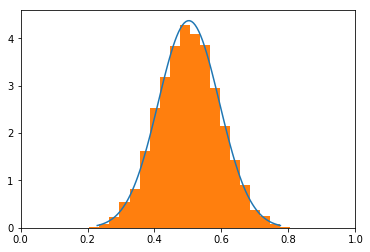

In [3]:
set1 = []
nr=10
for i in range(10000):
    
    point = 0
    for k in range(1,nr+1):
        point += random.random()
    point = point/nr
    
    set1.append(point)

(mu, sigma) = norm.fit(set1)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma))

plt.xlim(0,1)
plt.hist(set1,bins=20, normed=True)

plt.show()

In [4]:
min_step = 15
max_step = 3*60
mean_step = 20

200.0169871228336
-63.43921771413011
73.92401376480984


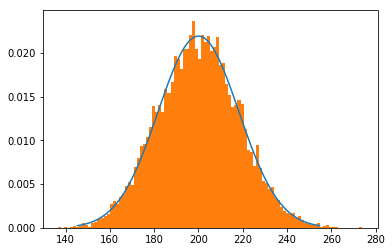

In [20]:
test_mean = 200
test_width = 100

test_min = test_mean - test_width
test_max = test_mean + test_width
test_shift = 0

distr_min = []
nr=10
for i in range(10000):
    
    test_distr = 0
    for k in range(1,nr+1):
        test_distr += random.uniform(test_min,test_max) + test_shift
    #    ((random.uniform(test_width-test_mean,test_width+test_mean) - (test_width-test_mean))) + test_width #/ (2*test_width))
    test_distr = test_distr/nr
    
    distr_min.append(test_distr)

(mu, sigma) = norm.fit(distr_min)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma))

print(mu)
print(min(distr_min)-mu)
print(max(distr_min)-mu)

#plt.xlim(0,1)
plt.hist(distr_min,bins=100, normed=True)
plt.show()

In [6]:
def generate_irwin_hall_number(ih_nr,ih_mean,ih_width): 
    ih_min = ih_mean - ih_width
    ih_max = ih_mean + ih_width

    ih_distr = 0
    for k in range(1,ih_nr+1):
        ih_distr += random.uniform(ih_min,ih_max)
    ih_distr=ih_distr/ih_nr
    
    return(ih_distr)

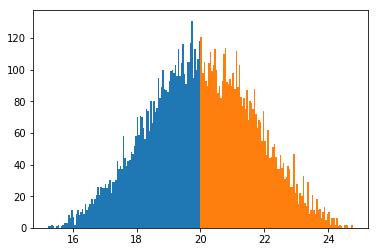

In [7]:
measure_minimum = 15
measure_maximum = 25

weight_min = 0.27
weight_max = 0.73

start_mean = 20

distr_min = []
distr_max = []

for i in range(10000):
    min_nr = generate_irwin_hall_number(3,start_mean,abs(start_mean-measure_minimum))

    if min_nr < start_mean:
        distr_min.append(min_nr)
        
    max_nr = generate_irwin_hall_number(3,start_mean,abs(start_mean-measure_maximum))
    if max_nr > start_mean:
           distr_max.append(max_nr)
    
min_hist=plt.hist(distr_min,bins=100)
max_hist=plt.hist(distr_max,bins=100)

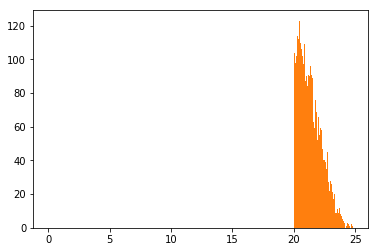

In [8]:
measure_minimum = 15
measure_maximum = 25

weight_min = 0.27
weight_max = 0.73

start_mean = 20

distr_min = []
distr_max = []

for i in range(10000):
    number = generate_irwin_hall_number(3,start_mean,abs(start_mean-measure_minimum))

    if min_nr < start_mean:
        distr_min.append(min_nr)
        
    max_nr = generate_irwin_hall_number(3,start_mean,abs(start_mean-measure_maximum))
    if max_nr > start_mean:
           distr_max.append(max_nr)
    
min_hist=plt.hist(distr_min,bins=100)
max_hist=plt.hist(distr_max,bins=100)

0.06666666666666667


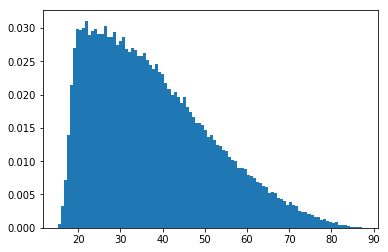

In [9]:
measure_minimum = 15
start_mean = 20
measure_maximum = 90

print((start_mean - measure_minimum) / (measure_maximum - measure_minimum))

weight_min = 2/30
weight_max = 1-weight_min

start_mean = 20

test_array = []
for i in range(100000):
    
    if random.random() < weight_min:
        test_nr = -abs(generate_irwin_hall_number(3,0,abs(start_mean-measure_minimum))) + start_mean
    else: 
        test_nr = +abs(generate_irwin_hall_number(3,0,abs(start_mean-measure_maximum))) + start_mean
    test_array.append(test_nr)
    
test_hist=plt.hist(test_array,bins=100,normed=True)

In [10]:
# def ih_3(x):
#     if -1.5<=x<=-0.5:
#         return((0.5 *(x+1.5)**2))
#     elif -0.5<x<=0.5:
#         return((0.5*(-2*(x+1.5)**2 + 6*(x+1.5) - 3)))
#     elif 0.5<x<=1.5:
#         return((0.5*((x+1.5)**2 - 6*(x+1.5) + 9)))
#     else:
#         return(0)

In [11]:
# generate_ih_3_y = []
# generate_ih_3_x = []

# for i in range(-200000,200000):
#     generate_ih_3_y.append(ih_3(i/100000))
#     generate_ih_3_x.append(i/100000)

# plt.plot(generate_ih_3_x, generate_ih_3_y)

In [12]:
#page = 1
#number_of_datapoints = 1000

datastreamid="saqn:ds:d811458"

distr_data = {}

#"2019-03-27T11:30:000Z"

def get_next_point(greater_than):
    data_url = "https://smartaqnet.teco.edu/v1.0/Datastreams('" + datastreamid + "')/Observations?$orderby=phenomenontime%20asc&$select=phenomenontime,result&$filter=phenomenontime%20ge%20" + greater_than + "&$top=1"
    data = json.loads(requests.get(data_url).text)["value"]
    return(data[0])


distr_data = {}

def get_distribution(nr_of_points, greater_than):

    data_url = "https://smartaqnet.teco.edu/v1.0/Datastreams('" + datastreamid + "')/Observations?$orderby=phenomenontime%20asc&$select=phenomenontime,result&$filter=phenomenontime%20ge%20" + greater_than + "&$top=" + str(nr_of_points)

    data = json.loads(requests.get(data_url).text)["value"]
    starting_time = data[0]["phenomenonTime"]
    end_time = data[-1]["phenomenonTime"]


    for i in range(len(data)):
        data[i]["phenomenonTime"] = tounixtime(todatetimeformat(data[i]["phenomenonTime"])) - tounixtime(todatetimeformat(starting_time))

        data_array = []
    lastpiece = data[0]
    for thispiece in data:
        if abs( thispiece["result"] - lastpiece["result"] ) < 40: #remove outliers
            data_array.append([thispiece["phenomenonTime"],thispiece["result"]])
            lastpiece=thispiece
        else:
            pass

    data_toplot = np.array(data_array)
    x_scatter, y_scatter = data_toplot.T

    z_score, p_value = stats.normaltest(y_scatter)

    distr_data[starting_time + "/" + end_time] = [z_score, p_value, np.std(y_scatter), np.mean(y_scatter),y_scatter]
    return([np.mean(y_scatter),np.std(y_scatter),list(y_scatter), end_time])


0.9007966695462531


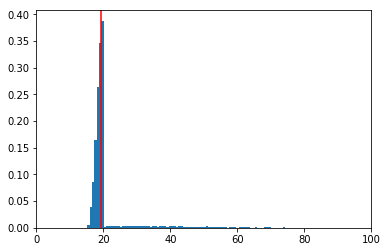

0.032631770636422086


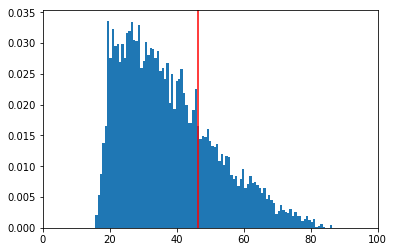

0.06715635154387534


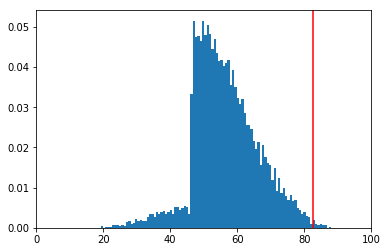

0.020841931176616146


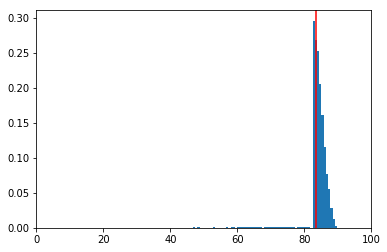

0.580643177611428


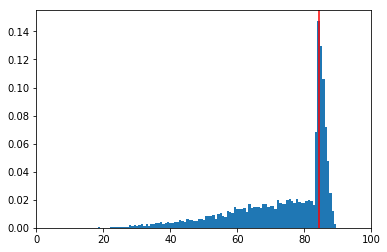

0.580643177611428


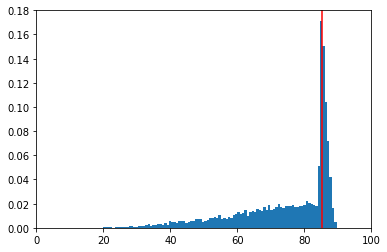

0.8045023559967425


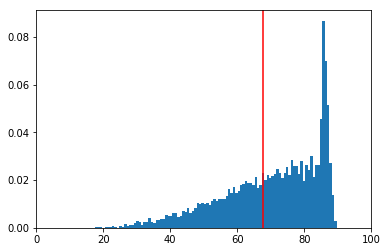

0.020841931176616146


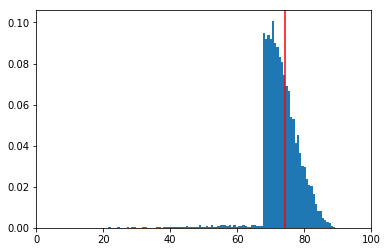

0.21267319047429045


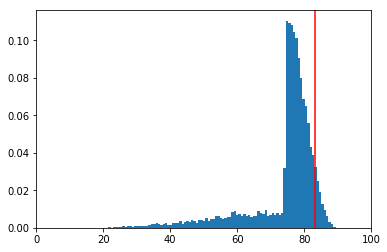

0.8369853176536324


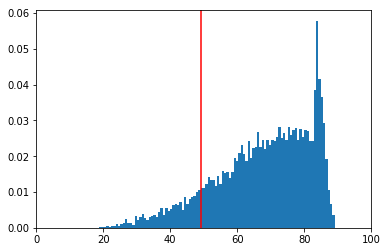

In [18]:
measure_minimum = 15
start_mean = 20
measure_maximum = 90

#weight_min bei dem die verteilung stetig wird:
#print((start_mean - measure_minimum) / (measure_maximum - measure_minimum))

norm_mean, norm_dev, norm_list, next_time = get_distribution(20,"2019-03-26T12:00:00.000Z")

new_mean = start_mean


measuring_times = []

for i in range(10):
    
    next_point = (get_next_point(next_time))["result"]

    prob_to_be_in = stats.norm.pdf(next_point,norm_mean,norm_dev)

    weight_max = prob_to_be_in
    weight_min = 1-weight_max

    if random.random() < weight_min:
        measuring_interval = -abs(generate_irwin_hall_number(3,0,abs(new_mean-measure_minimum))) + new_mean
    else: 
        measuring_interval = +abs(generate_irwin_hall_number(3,0,abs(new_mean-measure_maximum))) + new_mean

    
    #wann bekomme ich wieder eine stabile verteilung? um damit zu vergleichen? entweder kriterien wie punkte passen nicht oder
    #std behalten und den mean langsam mitnehmen
    
    next_datapoint = get_next_point(addsecutc(next_time,1))
    
    next_time = next_datapoint["phenomenonTime"]
    
    test_array = []
    print(weight_min)
    for j in range(10000):
    
        if random.random() < weight_min:
            test_nr = -abs(generate_irwin_hall_number(3,0,abs(new_mean-measure_minimum))) + new_mean
        else: 
            test_nr = +abs(generate_irwin_hall_number(3,0,abs(new_mean-measure_maximum))) + new_mean
        test_array.append(test_nr)


    new_mean = measuring_interval
    measuring_times.append(measuring_interval)

    plt.figure(i)
    test_hist=plt.hist(test_array,bins=100,normed=True)
    plt.axvline(x=measuring_interval,color='r')
    plt.xlim(0,100)
    plt.show()

(array([ 6.,  2.,  8., 11., 20., 14., 12.,  8.,  7., 12.]),
 array([19.41324084, 26.4412886 , 33.46933635, 40.49738411, 47.52543187,
        54.55347962, 61.58152738, 68.60957514, 75.63762289, 82.66567065,
        89.69371841]),
 <a list of 10 Patch objects>)

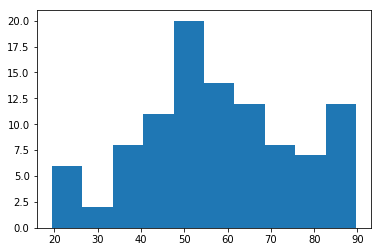

In [17]:
# plt.hist(measuring_times,bins=10)